## Connect google drive

In [1]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
final_spotify_data_cleaned = 'https://drive.google.com/file/d/1sfl8emc1NjjVd9TpuTHFdpUjJ-rCG_Jn/view?usp=share_link'

# link for final_spotify_data
# link = 'https://drive.google.com/file/d/1djViZyjX3-kNZbsY_nf-xovKDioIGpBU/view?usp=share_link'  
 
# to get the id part of the file
id = final_spotify_data_cleaned.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('final_spotify_data_cleaned.csv') 

## Load a dataset

In [4]:
import pandas as pd 

df = pd.read_csv('final_spotify_data_cleaned.csv')
print(df.shape)
df.head()

(676345, 18)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
0,100,0.72100,0.585,242014.0,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132,1.0,722.0,1McMsnEElThX1knmY4oliG,10.0,1.0,4.0,pop
1,96,0.02120,0.680,215627.0,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644,184.0,1016.0,1Xyo4u8uXC1ZmMpatF05PJ,0.0,1.0,4.0,canadian contemporary r&b
2,96,0.00146,0.514,200040.0,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,184.0,1016.0,1Xyo4u8uXC1ZmMpatF05PJ,1.0,1.0,4.0,canadian contemporary r&b
3,95,0.22100,0.700,140526.0,0.722,0.000000,0.2720,-3.558,0.0369,90.989,0.756,0.0,890.0,6fWVd57NKTalqvmjRd2t8Z,7.0,0.0,4.0,cali rap
4,94,0.21300,0.662,161385.0,0.413,0.000000,0.1340,-7.357,0.0299,93.005,0.467,0.0,785.0,2tIP7SsRs7vjIcLrU85W8J,0.0,1.0,4.0,australian hip hop


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676345 entries, 0 to 676344
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   popularity               676345 non-null  int64  
 1   acousticness             676345 non-null  float64
 2   danceability             676345 non-null  float64
 3   duration_ms              676345 non-null  float64
 4   energy                   676345 non-null  float64
 5   instrumentalness         676345 non-null  float64
 6   liveness                 676345 non-null  float64
 7   loudness                 676345 non-null  float64
 8   speechiness              676345 non-null  float64
 9   tempo                    676345 non-null  float64
 10  valence                  676345 non-null  float64
 11  total_available_markets  676345 non-null  float64
 12  release_date             676345 non-null  float64
 13  topartist_id             676345 non-null  object 
 14  key 

In [6]:
df.isnull().sum()

popularity                      0
acousticness                    0
danceability                    0
duration_ms                     0
energy                          0
instrumentalness                0
liveness                        0
loudness                        0
speechiness                     0
tempo                           0
valence                         0
total_available_markets         0
release_date                    0
topartist_id                    0
key                             0
mode                            0
time_signature                  0
artist_genre               164869
dtype: int64

## Split a dataset

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('popularity', axis=1)
y = df['popularity']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25)

print("{:<7}: {}".format('X_train', X_train.shape))
print("{:<7}: {}".format('X_val', X_val.shape))
print("{:<7}: {}".format('X_test', X_test.shape))

X_train: (405807, 17)
X_val  : (135269, 17)
X_test : (135269, 17)


## Target Encoding

In [8]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 5.8 MB/s eta 0:00:00


In [9]:
from category_encoders import TargetEncoder

features_te = ['topartist_id', 'artist_genre']

te = TargetEncoder(cols=features_te, handle_missing='return_nan').fit(X_train, y_train)

X_train = te.transform(X_train)
X_val = te.transform(X_val)
X_test = te.transform(X_test)

X_train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,total_available_markets,release_date,topartist_id,key,mode,time_signature,artist_genre
316604,0.00218,0.796,393071.0,0.826,0.921000,0.0742,-8.640,0.0676,127.031,0.536,185.0,3935.0,24.060652,6.0,0.0,4.0,NaN
39523,0.21400,0.869,184607.0,0.622,0.000000,0.0527,-5.841,0.2300,140.039,0.887,184.0,1669.0,32.065035,5.0,1.0,4.0,34.735812
541375,0.00192,0.504,334280.0,0.976,0.000000,0.1400,-4.314,0.2810,113.010,0.409,0.0,1643.0,27.612459,10.0,0.0,4.0,29.970485
490338,0.27000,0.720,238080.0,0.848,0.000004,0.2360,-5.519,0.0584,125.005,0.578,185.0,3315.0,13.606654,0.0,0.0,4.0,12.746781
129807,0.00273,0.848,105366.0,0.533,0.000000,0.0836,-9.654,0.2750,164.028,0.913,0.0,1004.0,32.019180,1.0,1.0,3.0,27.206675


## KNN to handle missing values

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5).fit(X_train.sample(frac=0.1))
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [11]:
# Confirm null values
X_train.isnull().sum()

acousticness               0
danceability               0
duration_ms                0
energy                     0
instrumentalness           0
liveness                   0
loudness                   0
speechiness                0
tempo                      0
valence                    0
total_available_markets    0
release_date               0
topartist_id               0
key                        0
mode                       0
time_signature             0
artist_genre               0
dtype: int64

## Check correlated features

<Axes: >

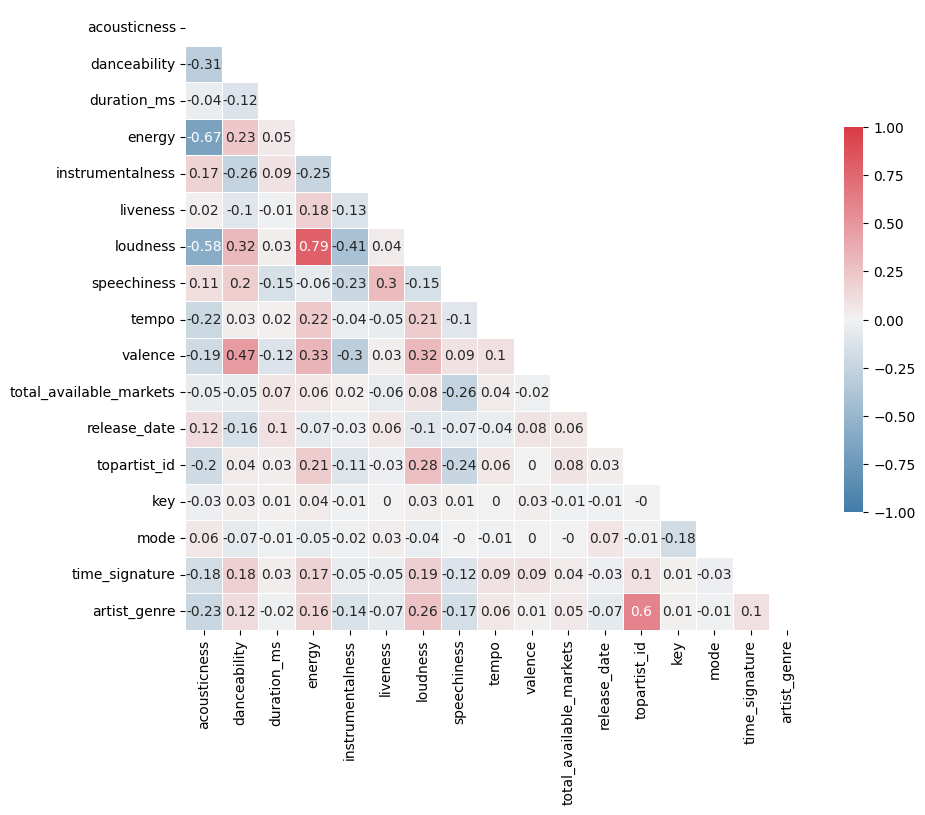

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True, n=20)
sns.heatmap(corr.round(2), mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## MinMaxScaler to normalize values 

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

## Add bias

In [14]:
#Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [15]:
feature_columns = list(X.columns)
feature_columns.insert(0, "bias")
feature_columns

['bias',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'total_available_markets',
 'release_date',
 'topartist_id',
 'key',
 'mode',
 'time_signature',
 'artist_genre']

## Train a model

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

In [17]:
vanilla_rr = RandomForestRegressor().fit(X_train, y_train)

## Visualize a tree

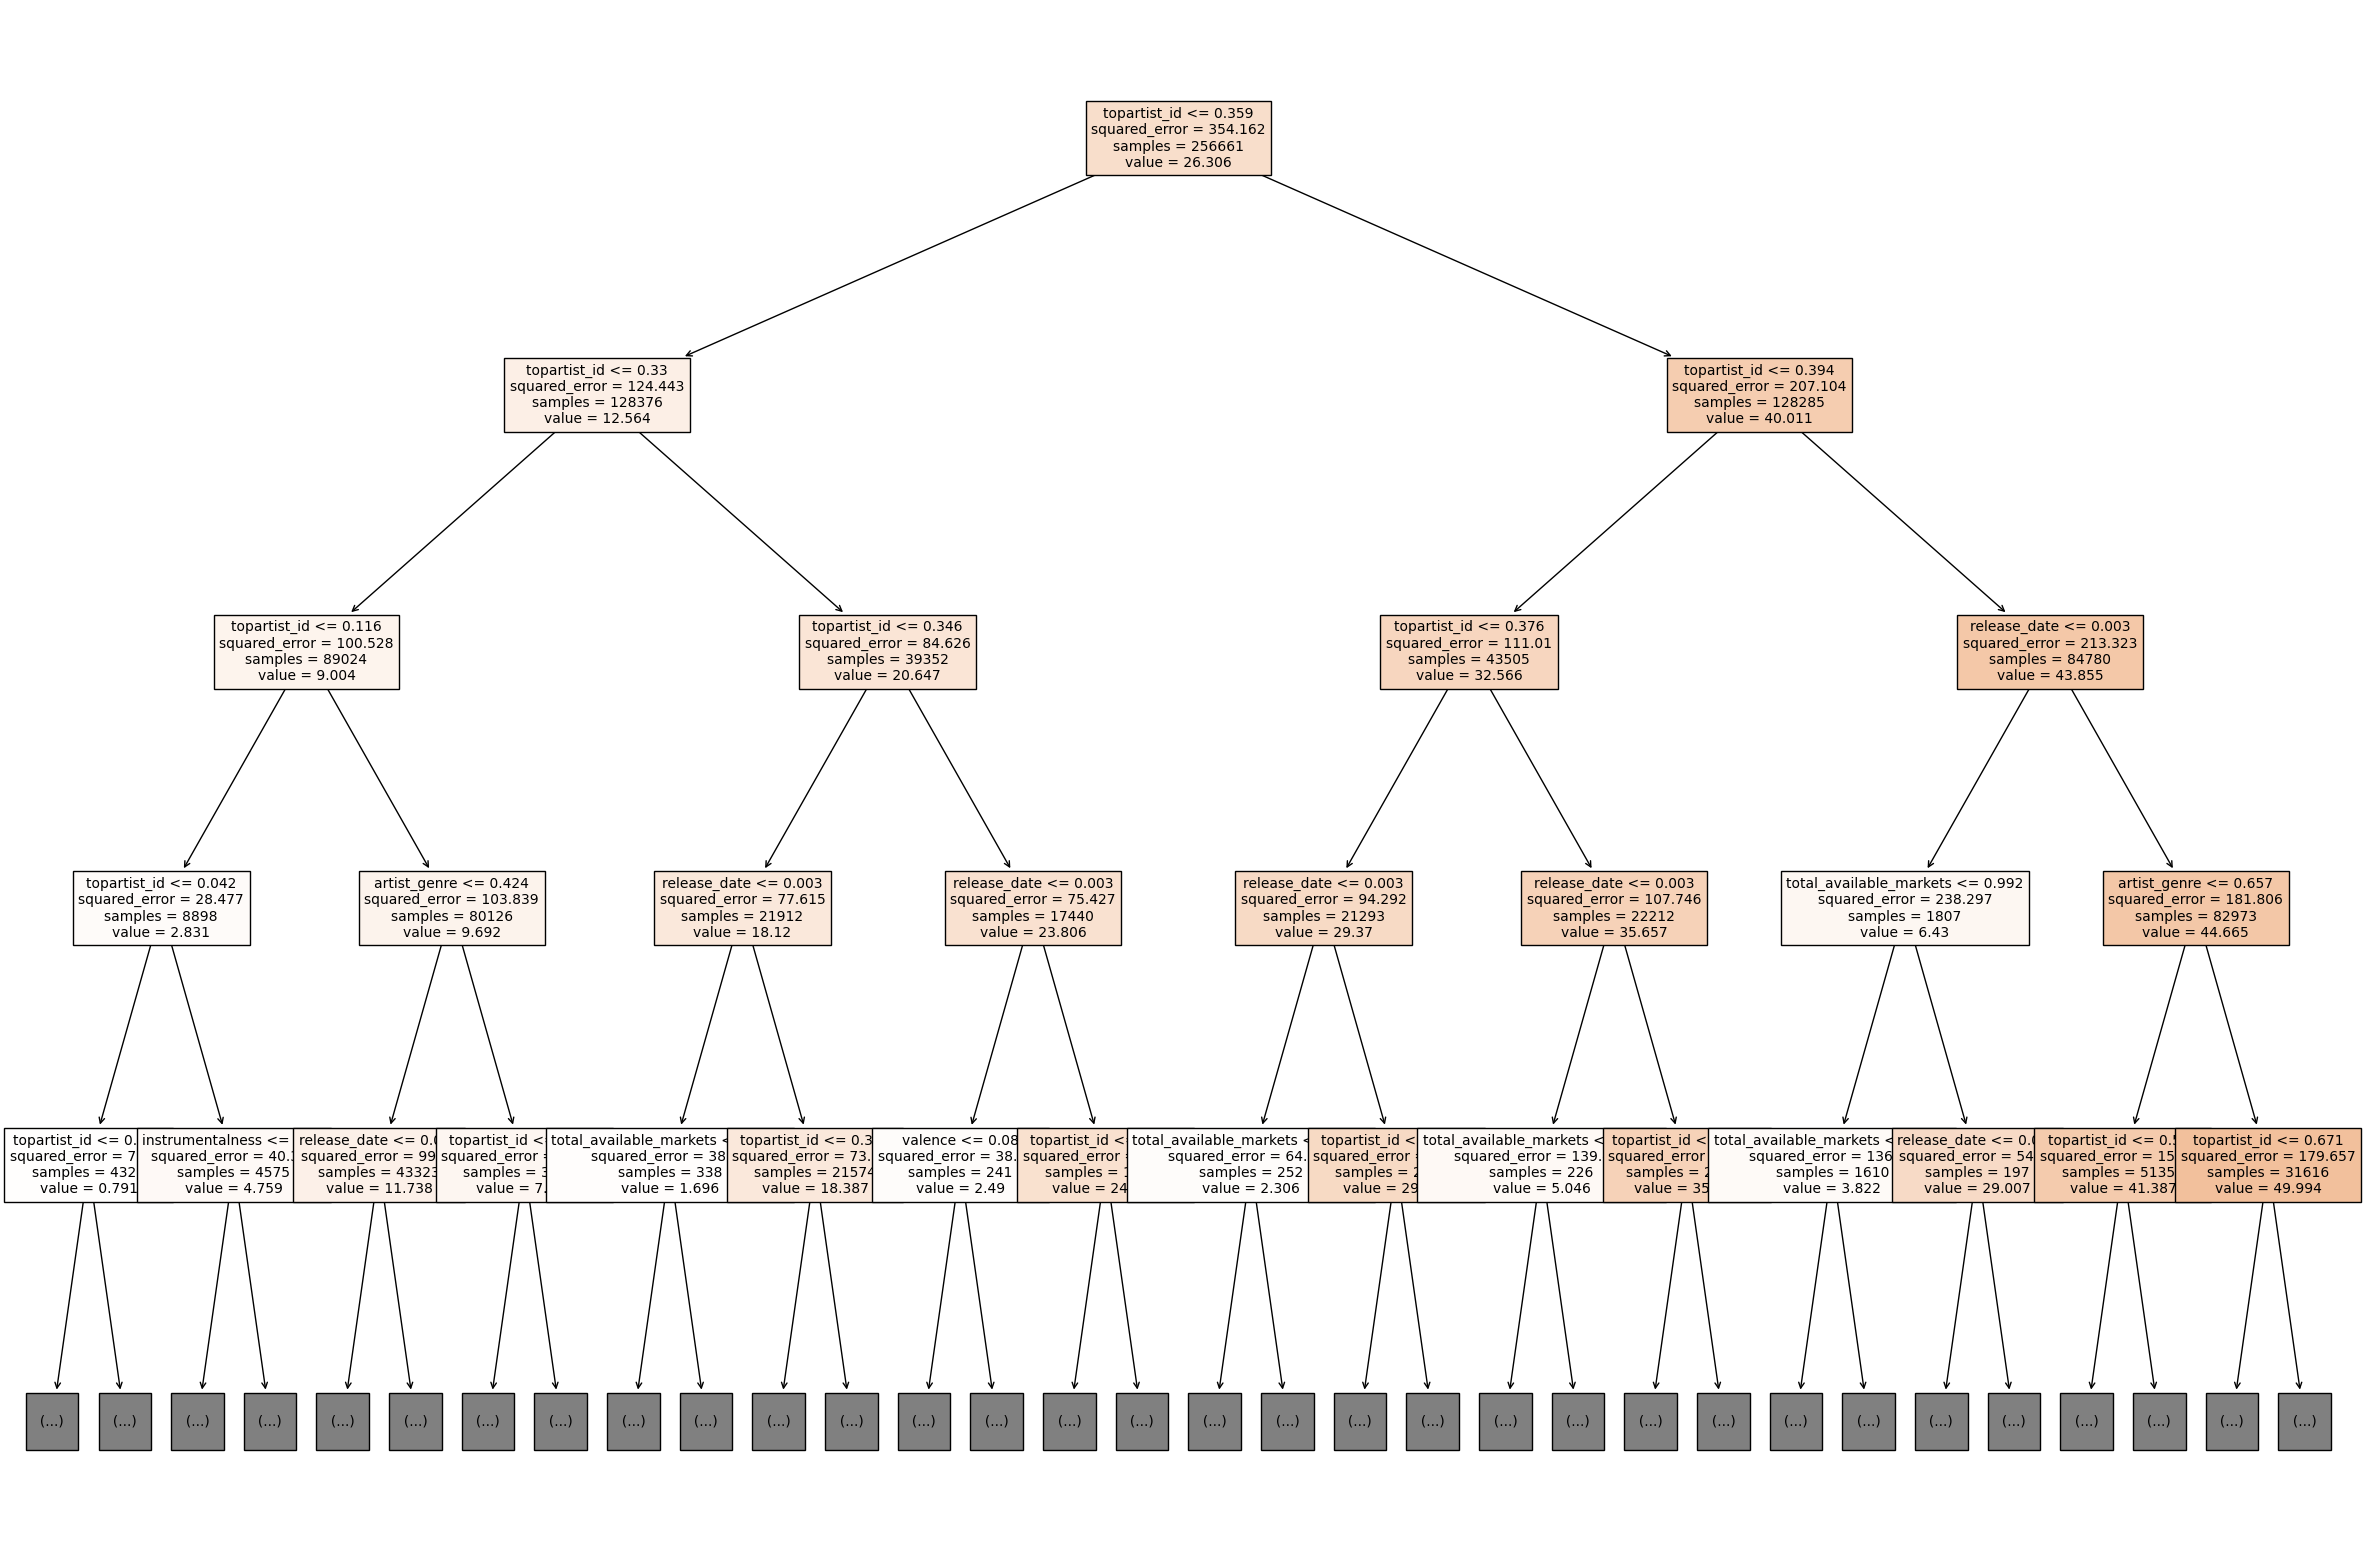

In [18]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(vanilla_rr.estimators_[0], max_depth=4, 
                   feature_names=feature_columns,
                   fontsize=10,
                   filled=True)

## Evaluate a model

In [20]:
print("{:<15} {}".format('Train R^2:', round(vanilla_rr.score(X_train, y_train),4)))
print("{} {}".format('Validation R^2:', round(vanilla_rr.score(X_val, y_val),4)))
print("{:<15} {}".format('Test R^2:', round(vanilla_rr.score(X_test, y_test),4)))
print("{:<15} {}".format('MSE Score:', round(mean_squared_error(y_test, vanilla_rr.predict(X_test)),4)))

Train R^2:      0.973
Validation R^2: 0.6157
Test R^2:       0.6157
MSE Score:      135.9671


## Feature Imporatances

topartist_id               0.681026
release_date               0.081833
artist_genre               0.046884
duration_ms                0.020110
speechiness                0.018389
loudness                   0.017710
liveness                   0.017091
acousticness               0.016992
danceability               0.016444
valence                    0.015494
total_available_markets    0.015331
tempo                      0.014769
energy                     0.014405
instrumentalness           0.013152
key                        0.007405
mode                       0.001622
time_signature             0.001343
bias                       0.000000
dtype: float64


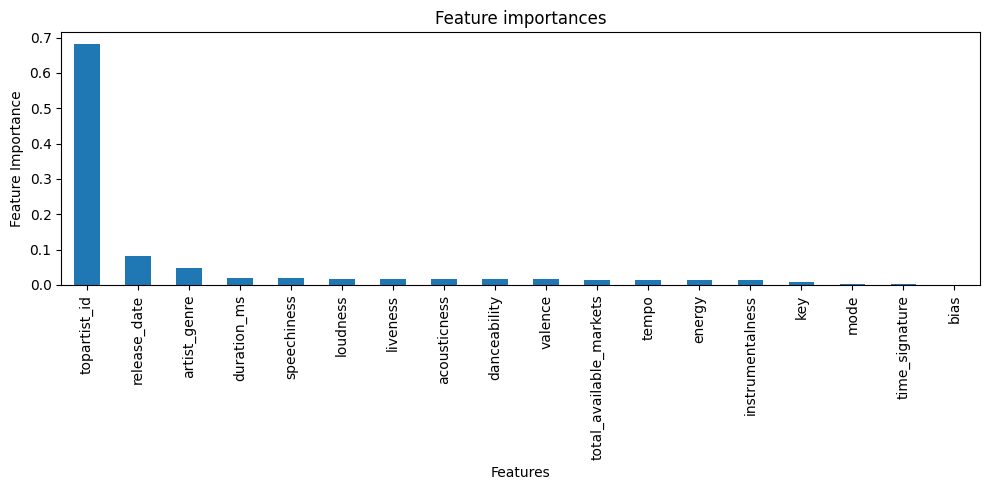

In [21]:
importances = pd.Series(vanilla_rr.feature_importances_, 
                        index=feature_columns).sort_values(ascending=False)
print(importances)

# Create a chart
fig, ax = plt.subplots(figsize=(10,5))
importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance")
fig.tight_layout()

## Random Greid Search

In [23]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=50, num=5)]
max_depth = [int(x) for x in np.linspace(5, 15, num=5)]
#min_samples_split = [int(x) for x in np.linspace(5, 15, num=5)]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,}
               #'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [5, 7, 10, 12, 15]}


In [24]:
rf_model = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_model, 
                               param_distributions = random_grid, 
                               n_iter=5, cv=5, verbose=2, 
                               random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'n_estimators': 40, 'max_depth': 15}

## Best Hyperparameter

In [25]:
model = rf_random.best_estimator_

print("{:<15} {}".format('Train R^2:', round(model.score(X_train, y_train),4)))
print("{} {}".format('Validation R^2:', round(model.score(X_val, y_val),4)))
print("{:<15} {}".format('Test R^2:', round(model.score(X_test, y_test),4)))
print("{:<15} {}".format('MSE Score:', round(mean_squared_error(y_test, model.predict(X_test)),4)))

Train R^2:      0.8148
Validation R^2: 0.5883
Test R^2:       0.5875
MSE Score:      145.94


## Feature Impoartances with Best Hyperparameter

topartist_id               0.817749
release_date               0.078989
artist_genre               0.041398
total_available_markets    0.011515
duration_ms                0.007693
speechiness                0.006405
acousticness               0.005325
loudness                   0.005262
instrumentalness           0.005245
liveness                   0.005085
danceability               0.004193
valence                    0.003629
energy                     0.003356
tempo                      0.002663
key                        0.001010
time_signature             0.000244
mode                       0.000238
bias                       0.000000
dtype: float64


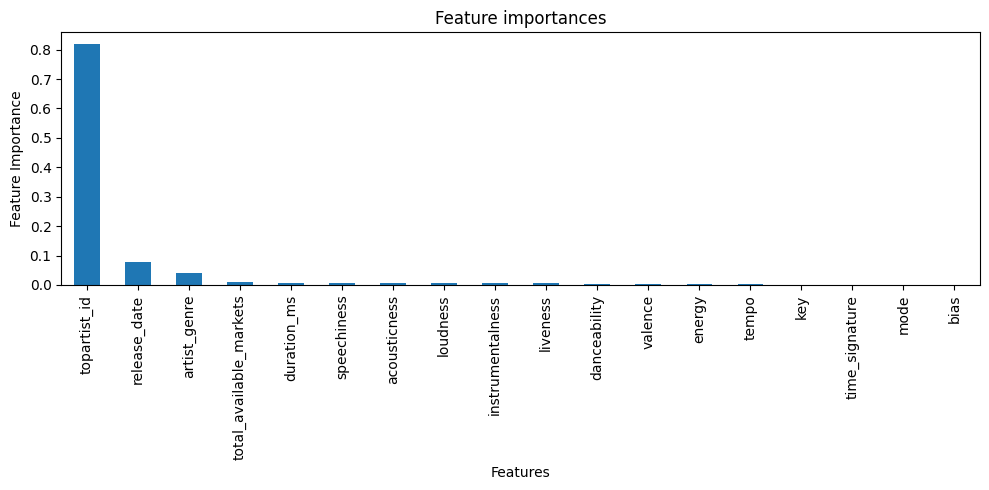

In [26]:
importances = pd.Series(model.feature_importances_, 
                        index=feature_columns).sort_values(ascending=False)
print(importances)

# Create a chart
fig, ax = plt.subplots(figsize=(10,5))
importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_xlabel("Features")
ax.set_ylabel("Feature Importance")
fig.tight_layout()

In [27]:
model_1 = RandomForestRegressor(n_estimators=100, max_depth=20).fit(X_train, y_train)

In [28]:
print("{:<15} {}".format('Train R^2:', round(model_1.score(X_train, y_train),4)))
print("{} {}".format('Validation R^2:', round(model_1.score(X_val, y_val),4)))
print("{:<15} {}".format('Test R^2:', round(model_1.score(X_test, y_test),4)))
print("{:<15} {}".format('MSE Score:', round(mean_squared_error(y_test, model_1.predict(X_test)),4)))

Train R^2:      0.8873
Validation R^2: 0.6068
Test R^2:       0.6065
MSE Score:      139.2239
